# Lead Scoring Case Study

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting the display options to display the maximum number of columns
pd.set_option('display.max_columns',None)

In [3]:
#Reading the csv file
lead_df=pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the shape of the dataset
lead_df.shape

(9240, 37)

In [5]:
#Checking the contents of the dataset
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Null Values seem to be present in a few columns. The datatypes of the columns seem to be fine.

In [6]:
#Checking the distribution of the numerical columns
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking the values in the columns
for i in lead_df.columns:
    print(lead_df[i].value_counts())

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [8]:
#Checking the values of all object columns
for i in lead_df.columns:
    if lead_df[i].dtypes=="O" and i!='Prospect ID':
        print(lead_df[i].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page V

Some Columns have been noted with the category "**select**" in them which is basically a null value.

## Cleaning the DataFrame

In [9]:
#Converting all the values to lower case
lead_df = lead_df.applymap(lambda x : x.lower() if type(x)==str else x)

In [10]:
#Replacing all the detected 'select' values with Null values
lead_df = lead_df.replace('select',np.nan)

In [11]:
#Checking the number of unique values in columns as many columns were noticed to only have one value
lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

Here we notice that there are columns with only one unique value, which won't be useful for our analysis

In [12]:
#Dropping Columns with only one unique value
lead_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [13]:
#Checking the percentage of null values in the columns
null_df = pd.DataFrame(round(lead_df.isnull().sum()/len(lead_df)*100, 2))
null_df

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


In [14]:
#Dropping columns having more than 40% null values
lead_df.drop(null_df[null_df[0]>40].index,axis=1,inplace=True)

In [15]:
#Checking for null value percentage again
round(lead_df.isnull().sum()/len(lead_df)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Checking the contents the columns '**Prospect ID**', '**Lead Number**'and , '**Last Activity**'  also do not seem to be useful for analysis and model creation. So it is better to drop them. "**Last Activity**" and "**Last Notable Activity** seems to be very much redundant.

In [16]:
#Dropping the aforementioned columns
lead_df.drop(['Prospect ID', 'Lead Number','Last Activity'], axis=1, inplace=True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,interested in other courses,NaN,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,ringing,NaN,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,india,business administration,student,better career prospects,no,no,no,no,no,no,will revert after reading the email,mumbai,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,ringing,mumbai,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,mumbai,no,modified


We still have the columns 'Country','Specialization','What is your current occupation','What matters most to you in choosing a course', 'Tags', 'City' with a large percentage of missing values which have to be dealt with.

In [17]:
#Replacing missing values in 4 columns with 'not declared'
lead_df['Country']=lead_df['Country'].fillna('not declared')
lead_df['Specialization']=lead_df['Specialization'].fillna('not declared')
lead_df['What is your current occupation']=lead_df['What is your current occupation'].fillna('not declared')
lead_df['What matters most to you in choosing a course']=lead_df['What matters most to you in choosing a course'].fillna('not declared')
lead_df['Tags']=lead_df['Tags'].fillna('not declared')
lead_df['City']=lead_df['City'].fillna('not declared')

#checking the summary of contents
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

In [18]:
#Re-checking the percentage of missing values
round(lead_df.isnull().sum()/len(lead_df)*100, 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Tags                        

We can remove all the specific entries with null values as the loss of data is only a very small percentage.

In [19]:
#Dropping all entries with null values
lead_df.drop(lead_df[lead_df.isnull().sum(axis=1)>0].index,inplace=True)

In [20]:
#Checking the shape of the dataset
lead_df.shape

(9074, 22)

In [21]:
#Checking the percentage of null values
round(lead_df.isnull().sum()/len(lead_df)*100, 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Tags                                          

The missing values have all been treated now.

In [22]:
#Generalizing the country columns as it has many categories and all the categories apart from 'India' and 'not provided' have very few entries in them
def cat(x):
    category=''
    if x == 'india':
        category='india'
    elif x == 'not declared':
        category='not declared'
    else:
        category='outside india'
    return category
lead_df['Country'] = lead_df['Country'].map(lambda x:cat(x))

In [23]:
#Checking the value counts of country to affirm
lead_df['Country'].value_counts()

india            6491
not declared     2296
outside india     287
Name: Country, dtype: int64

Since now we have a clean dataset. We can proceed to exploring the dataset using Exploratory Data Analysis

### Segmentation into categorical and continuous variables

In [24]:
#Checking the datatypes to categorize into categorical and continuous variables
dt_df=pd.DataFrame(lead_df.dtypes)
dt_df

,0
Lead Origin,object
Lead Source,object
Do Not Email,object
Do Not Call,object
Converted,int64
TotalVisits,float64
Total Time Spent on Website,int64
Page Views Per Visit,float64
Country,object
Specialization,object


In [25]:
#List of Categorical variables
var_cat=[i for i in dt_df.index if dt_df.loc[i,0]=='object']
var_cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [26]:
#List of Continuous variables
var_num=[i for i in dt_df.index if dt_df.loc[i,0] !='object']
var_num

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [27]:
#Removing the Target Variable 'Converted' from the list of continuous variables
var_num.remove('Converted')
var_num 

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

## Outlier Analysis and Treatment

<Figure size 1440x5760 with 0 Axes>

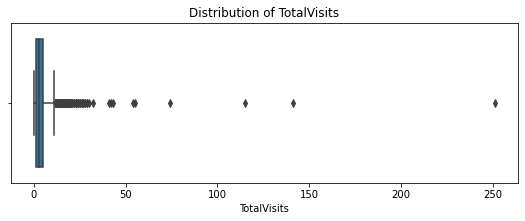

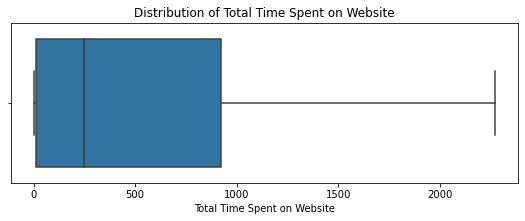

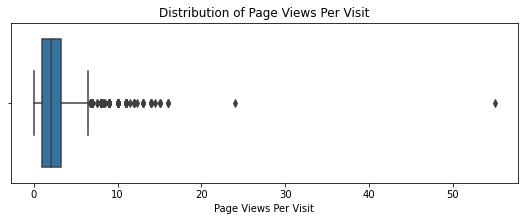

In [28]:
#Boxplotting the continuous variables to check for outliers

plt.figure(figsize=(20,80))

for i in range(1,len(var_num)+1):
    plt.figure(figsize=(20,10))
    plt.subplot(3,2,i)
    sns.boxplot(lead_df[var_num[i-1]])
    plt.title(f'Distribution of {var_num[i-1]}')
    plt.show()

There seems to be outliers in the 'TotalVisits' and "Page Views Per Visit'.

In [29]:
#Checking column 'TotalVisits' closely for outliers
lead_df['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.90,0.99,0.995,0.998,0.999,0.9995])

count     9074.000000
mean         3.456028
std          4.858802
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
90%          7.000000
99%         17.000000
99.5%       21.000000
99.8%       27.000000
99.9%       31.854000
99.95%      54.463500
max        251.000000
Name: TotalVisits, dtype: float64

In [30]:
#Dropping the entries above the 99.9th percentile
Q = lead_df['TotalVisits'].quantile(0.999)
lead_df.drop(lead_df[lead_df['TotalVisits']>Q].index,inplace=True)

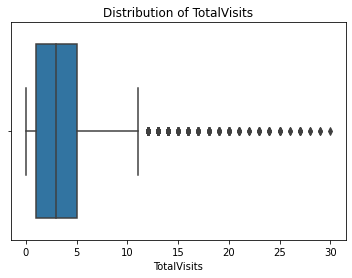

In [31]:
#Checking the boxplot again
sns.boxplot(lead_df['TotalVisits'])
plt.title(f'Distribution of TotalVisits')
plt.show()

The outlier treatment is successful

In [32]:
#Checking column 'Page Views Per Visit' closely for outliers
lead_df['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.90,0.99,0.995,0.998,0.999,0.9995])

count     9064.000000
mean         2.361857
std          2.085844
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
90%          5.000000
99%          9.000000
99.5%       11.000000
99.8%       13.000000
99.9%       14.000000
99.95%      15.000000
max         24.000000
Name: Page Views Per Visit, dtype: float64

In [33]:
#Dropping the entries above the 99.9th percentile
Q = lead_df['Page Views Per Visit'].quantile(0.999)
lead_df.drop(lead_df[lead_df['Page Views Per Visit']>Q].index,inplace=True)

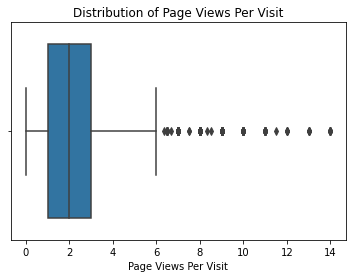

In [34]:
#Checking the boxplot again
sns.boxplot(lead_df['Page Views Per Visit'])
plt.title(f'Distribution of Page Views Per Visit')
plt.show()

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Categorical Variables

<Figure size 1440x12960 with 0 Axes>

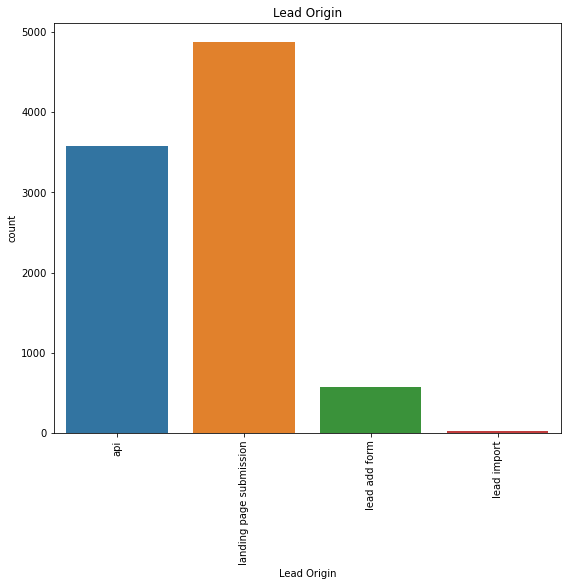

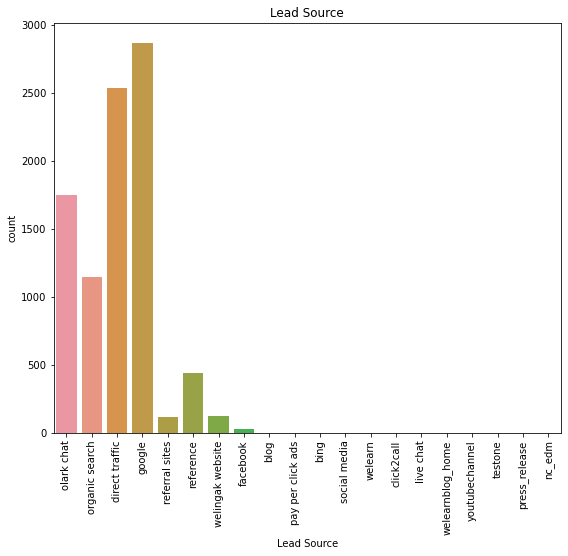

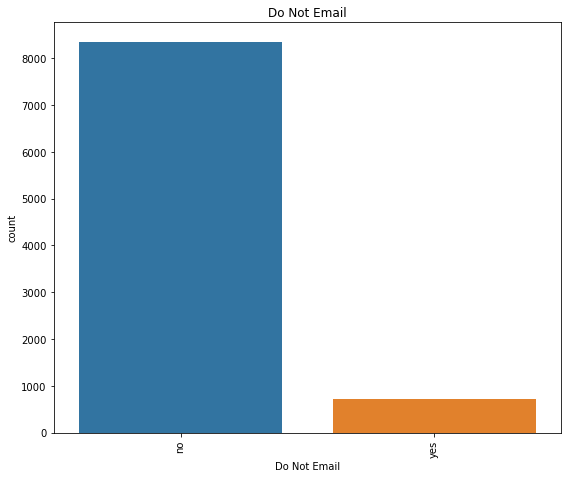

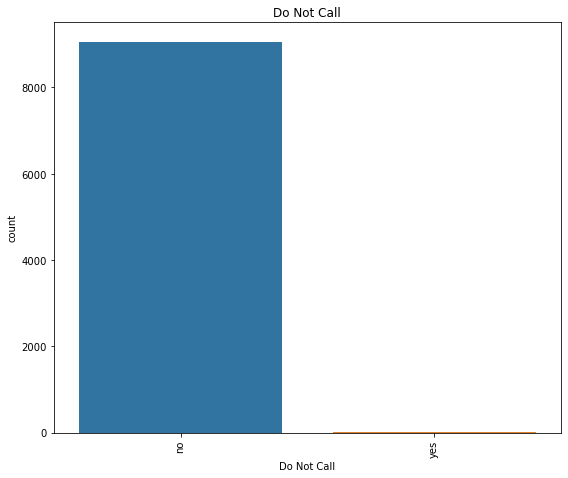

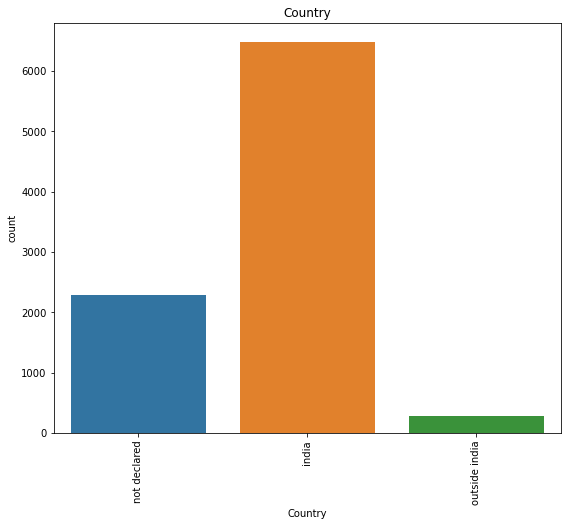

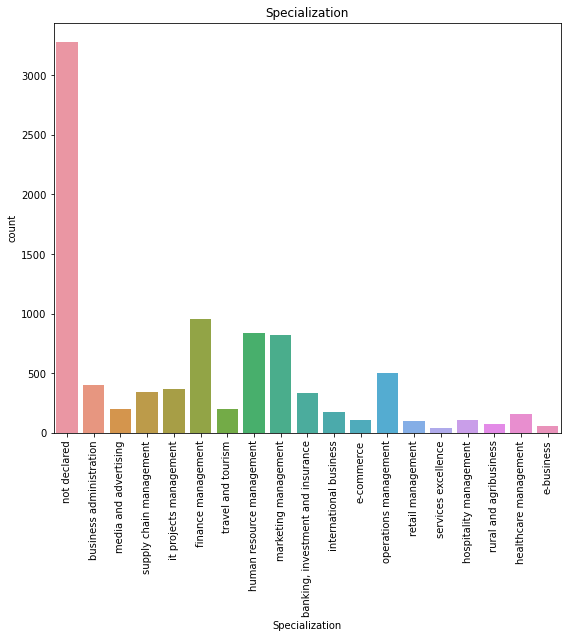

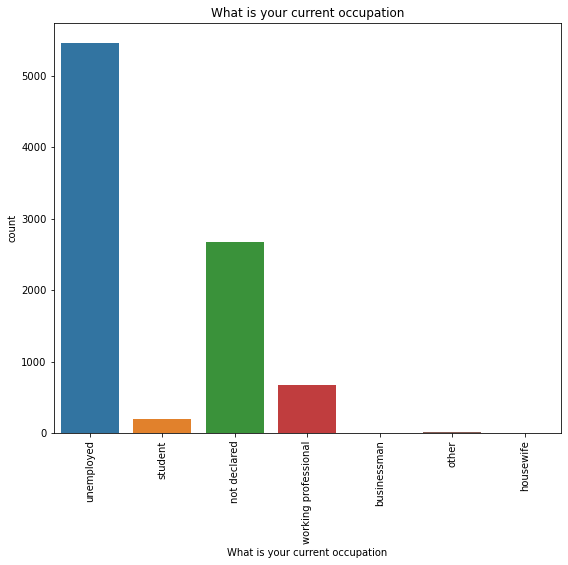

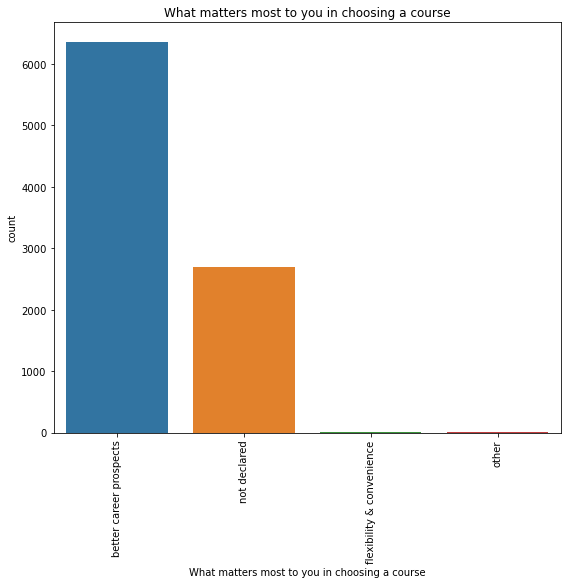

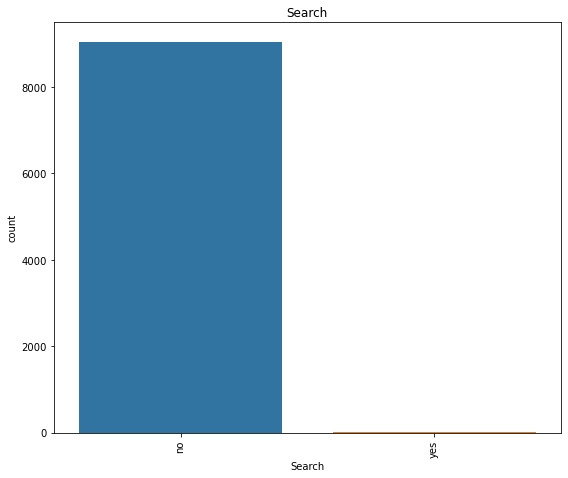

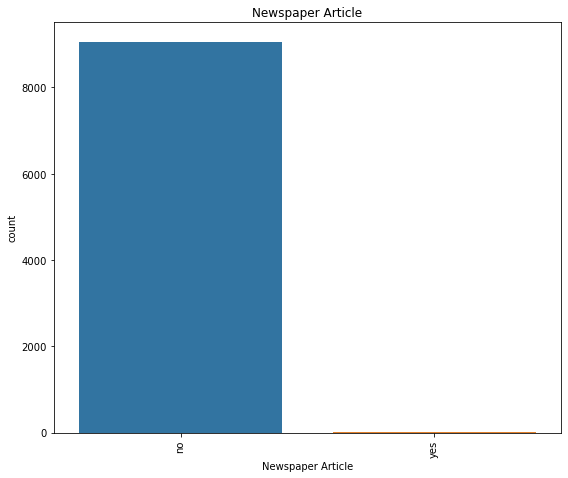

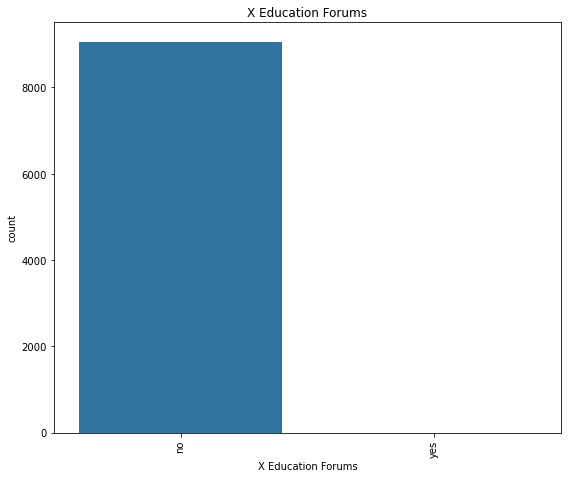

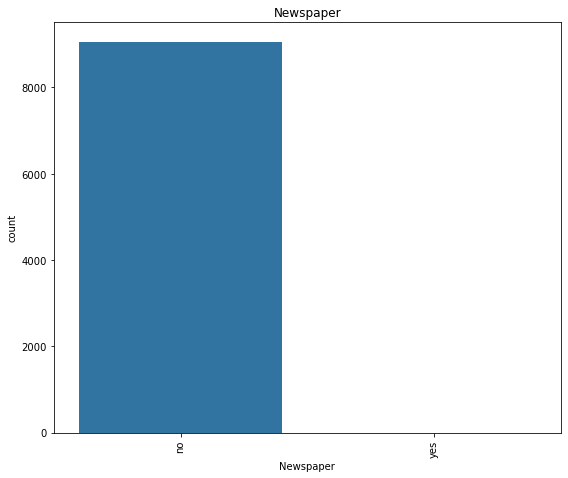

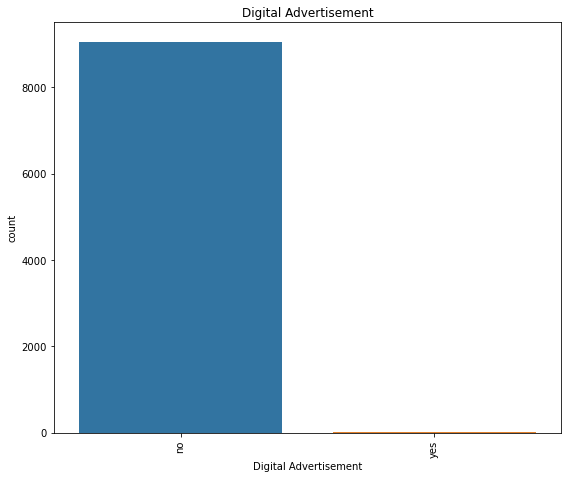

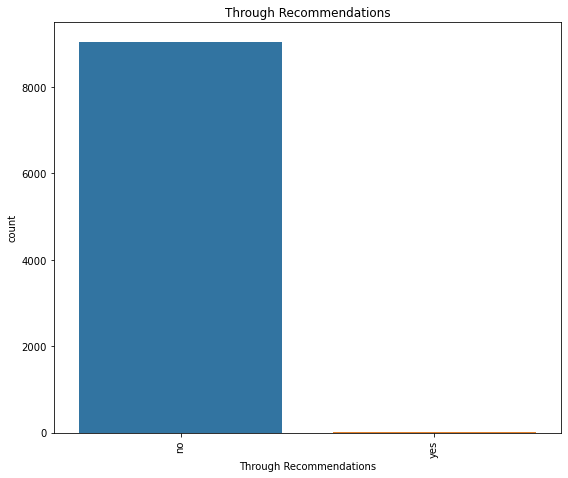

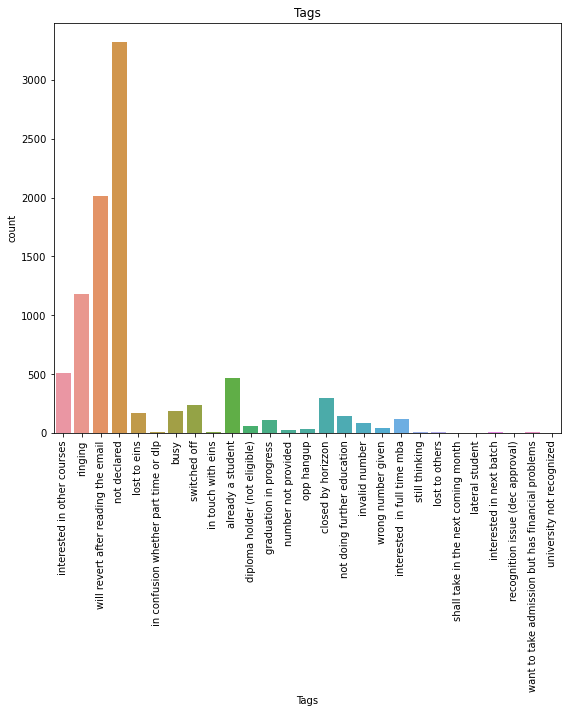

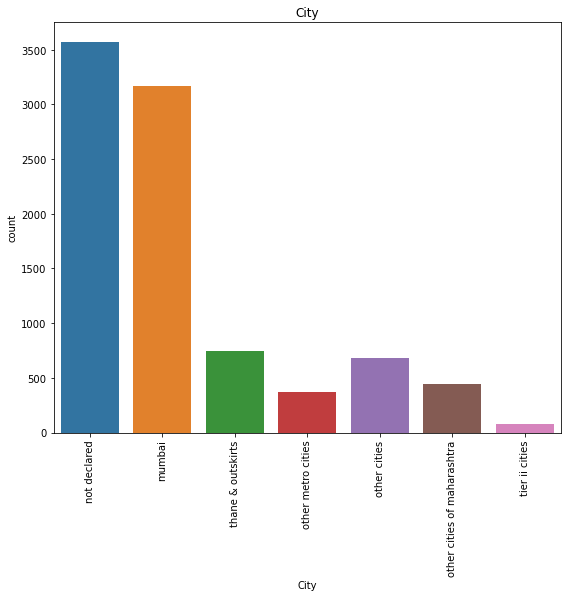

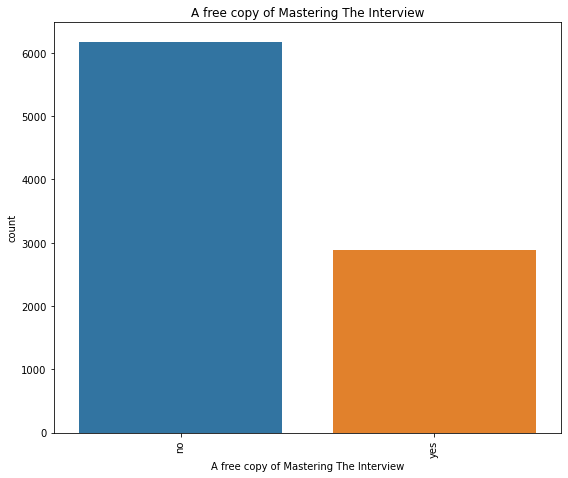

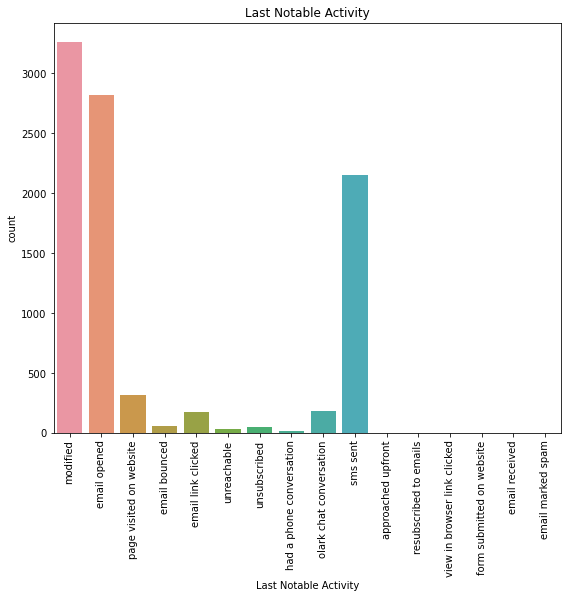

In [35]:
#Plotting the value counts of all categorical variables
plt.figure(figsize=(20,180))

for i in range(1,len(var_cat)+1):
    plt.figure(figsize=(20,80))
    plt.subplot(9,2,i)
    sns.countplot(lead_df[var_cat[i-1]]).tick_params(axis='x', rotation=90)
    plt.title(var_cat[i-1])
    plt.show()

**OBSERVATIIONS**<br><br>
1.Most of the customers were identified as leads through Landing Page Submissions and api.<br><br>
2.Most of the leads have come through Google Search and Direct Traffic.<br><br>
3.Most of the customers have not changed the default option (NO) of 'Do not Call' and 'Do not Email'.<br><br>
4.The company should focus more on the student market in India.<br><br>
5.The largest number of employed students are from the management background.<br><br>
6.The largest chunk of the student population is unemployed which is obvious.<br><br>
7.The students are mainly joining the course for better career prospects.<br><br>
8.The company can reduce its investment in ads as it doesn't seems to be driving the enrollments.<br><br>
9.The most prominent tag after 'not declared' is 'will revert after reading the email'.<br><br>
10.Most of the customers are from Mumbai.<br><br>
11.A considerable amount of people have opted for a free copy of "mastering the interview".<br><br>
12.The last notable activity of most of the people are that they have opened the email or modified their profiles.<br><br>

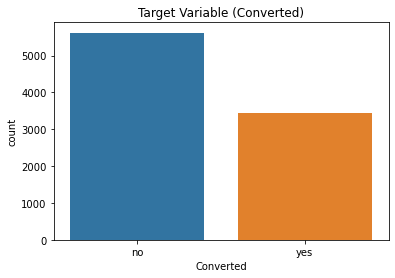

In [36]:
#Checking the data imbalance with respect to the target variable
sns.countplot(lead_df['Converted'])
plt.title('Target Variable (Converted)')
plt.xticks(ticks=[0,1],labels=['no','yes'])
plt.show()

In [37]:
#Calculating the Data Imbalance Percentage
(len(lead_df[lead_df.Converted==1])/len(lead_df[lead_df.Converted==0]))*100

61.03503467899698

The data imbalance seems to be above moderate around 60%

#### Numerical Variables

<Figure size 1440x5760 with 0 Axes>

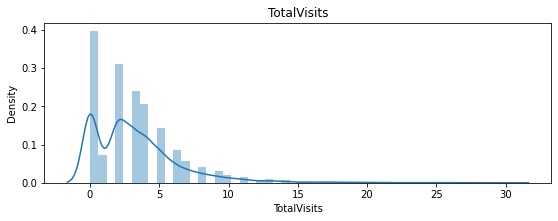

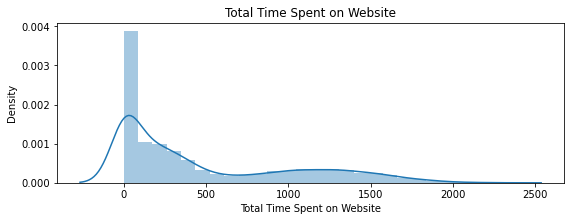

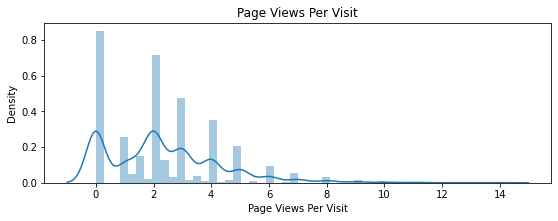

In [38]:
#Plotting the Distribution of the Continuous Variables
plt.figure(figsize=(20,80))

for i in range(1,len(var_num)+1):
    plt.figure(figsize=(20,10))
    plt.subplot(3,2,i)
    sns.distplot(lead_df[var_num[i-1]])
    plt.title(var_num[i-1])
    plt.show()

**OBSERVATIONS**<br><br>
1.Many customers made a maximum of approx 10 visits to the website.<br><br>
2.A large group customers have spend less than 8 hrs(500 mins) at maximum in the website.<br><br>
3.Most customers have less than 5 page views per visit to the website.<br><br>

#### Analysis of all categorical variables with respect to the target variable

<Figure size 1440x12960 with 0 Axes>

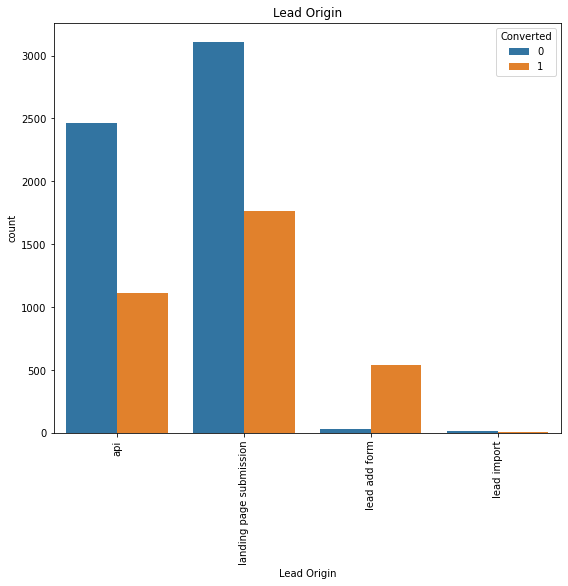

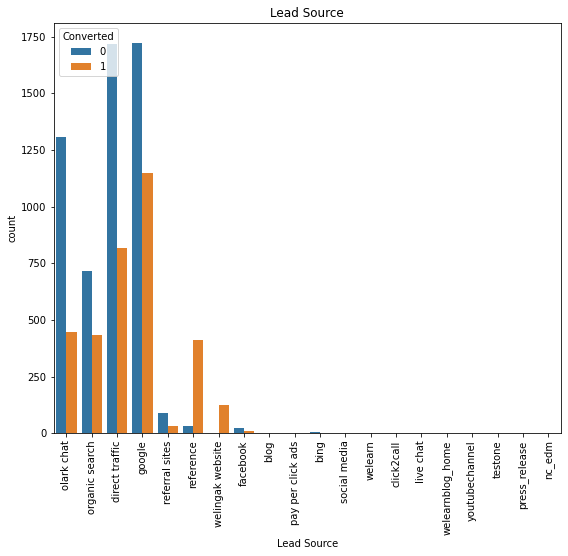

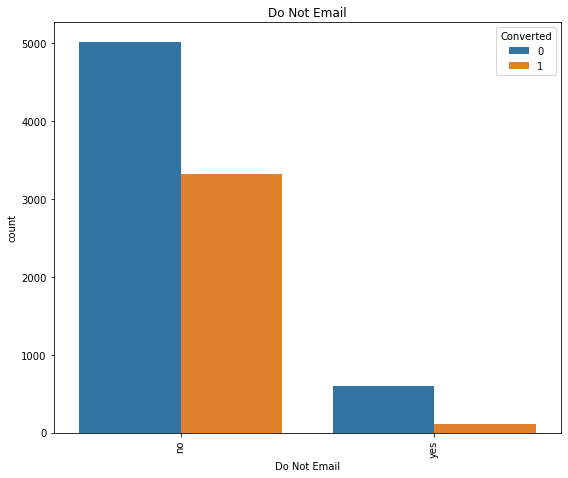

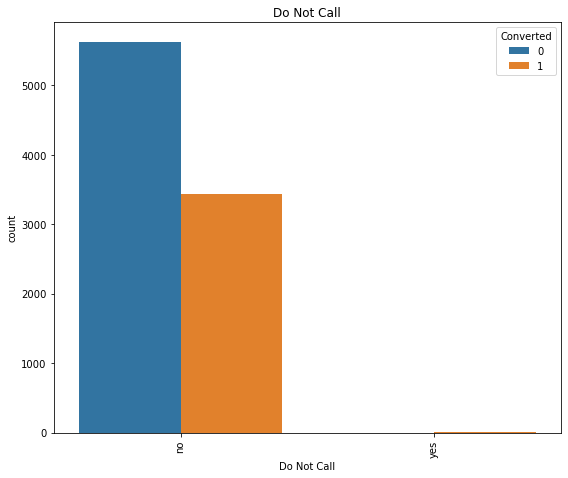

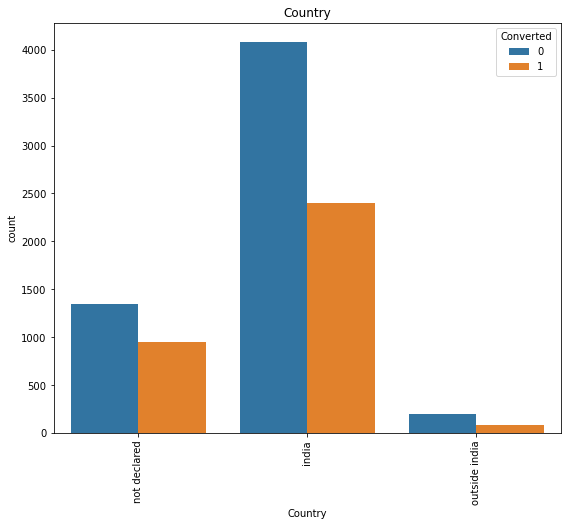

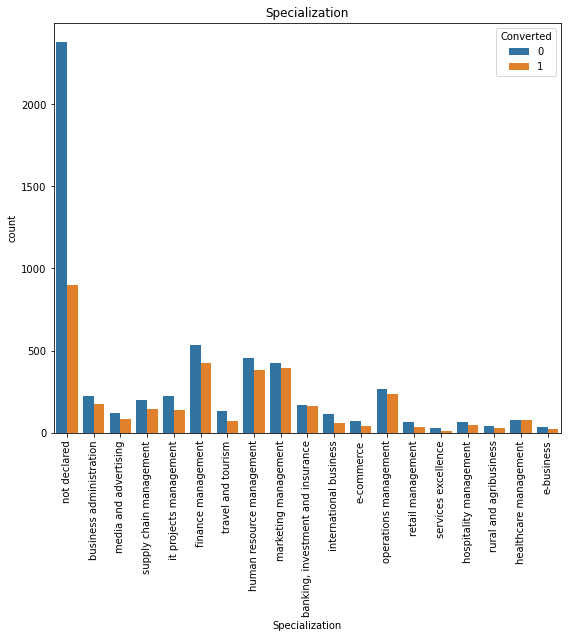

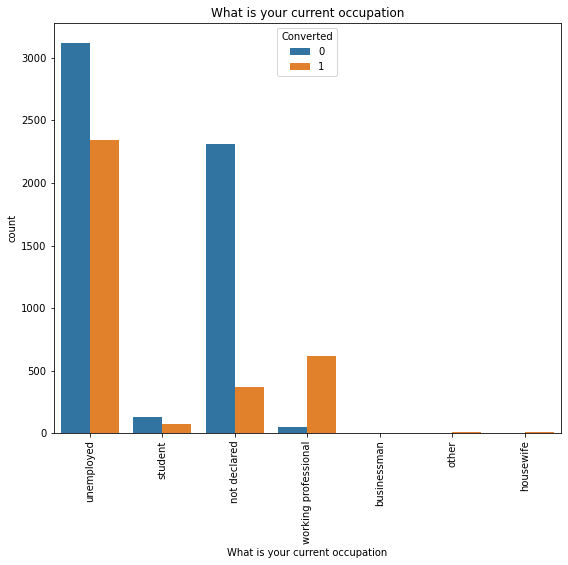

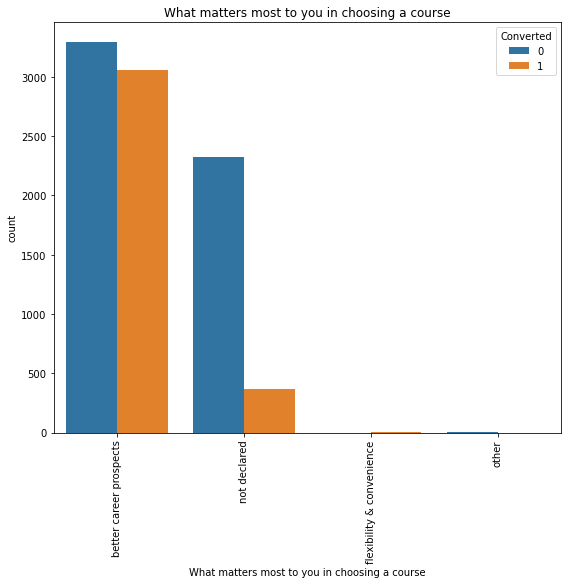

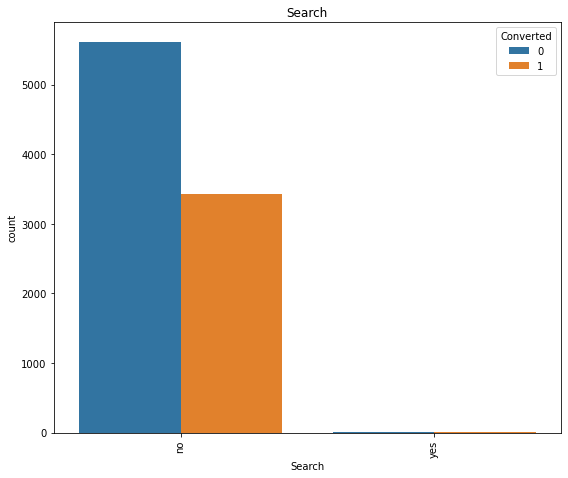

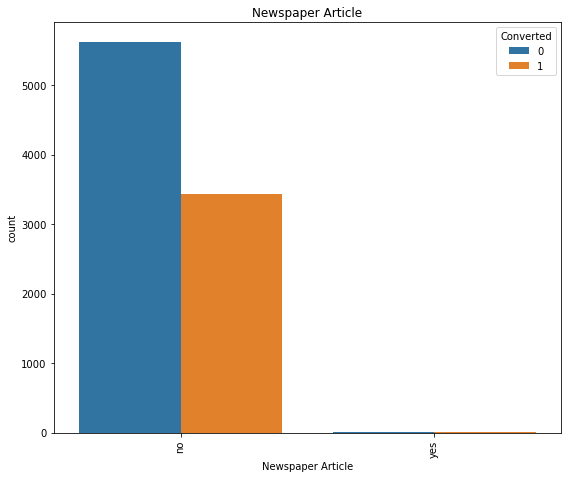

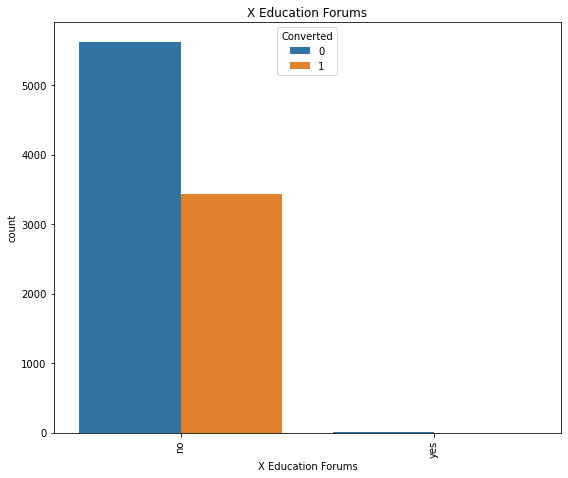

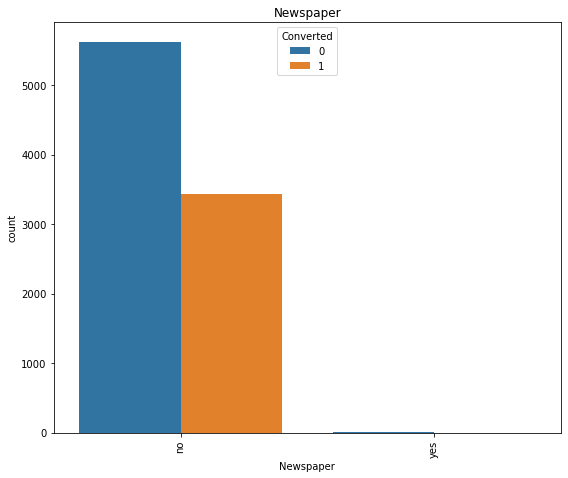

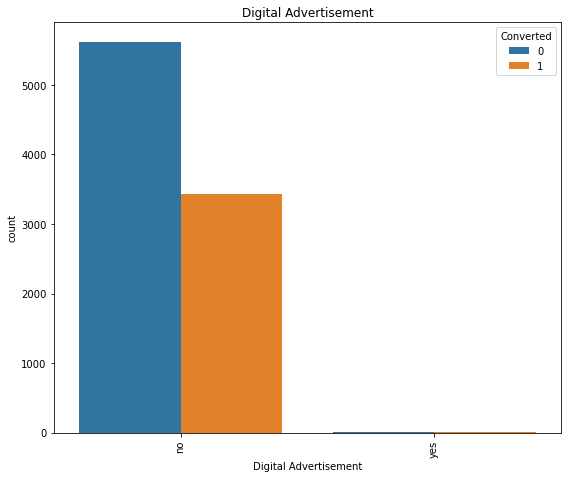

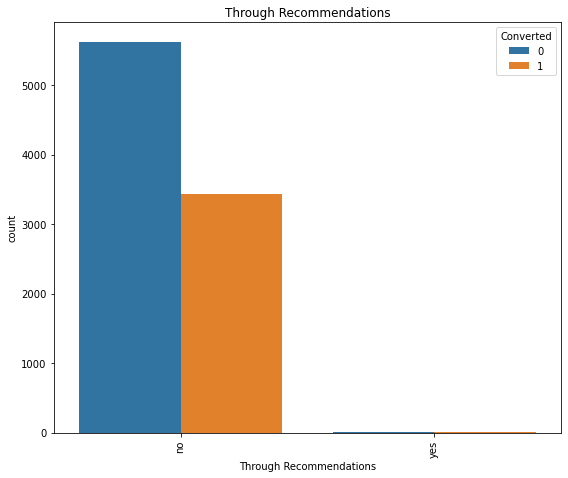

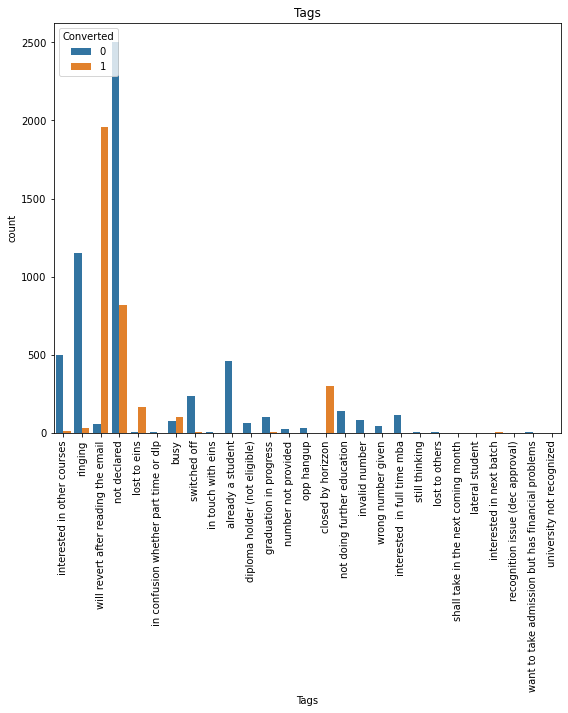

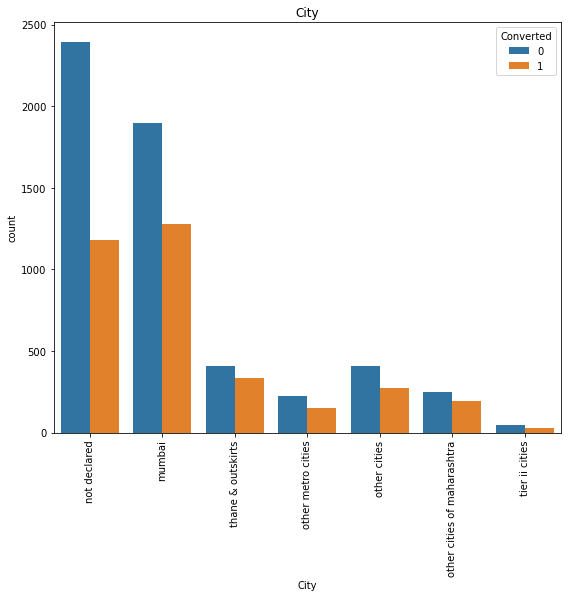

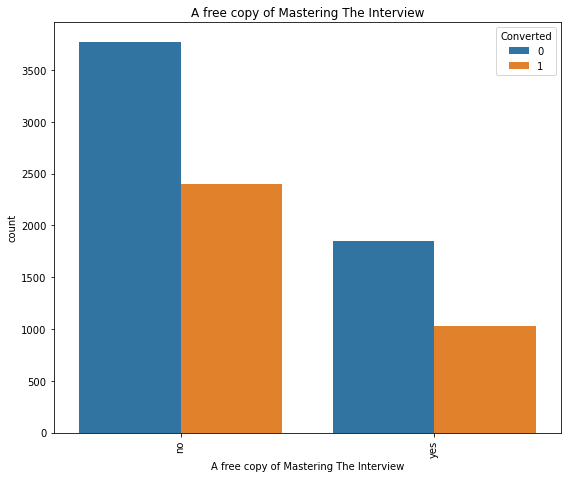

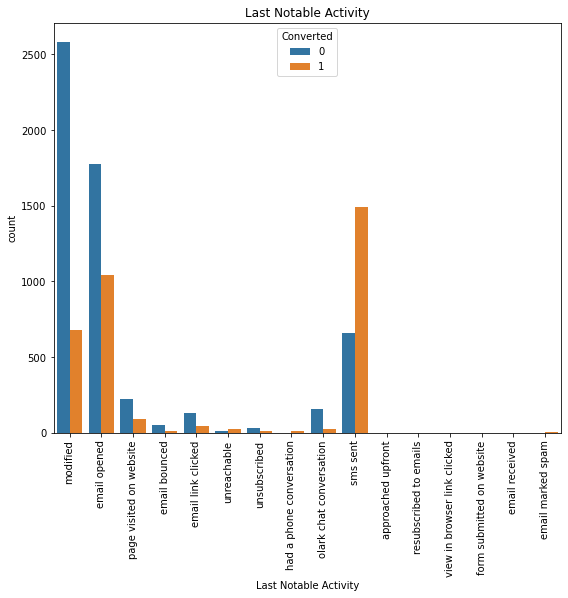

In [39]:
plt.figure(figsize=(20,180))

for i in range(1,len(var_cat)+1):
    plt.figure(figsize=(20,80))
    plt.subplot(9,2,i)
    sns.countplot(x=var_cat[i-1], hue='Converted',data=lead_df).tick_params(axis='x', rotation=90)
    plt.title(var_cat[i-1])
    
plt.show()

**OBSERVATIONS**<br><br>
1.The rate of conversion for leads that have been ascertained through the lead add form are high.<br><br>
2.Students coming through references and through the welingak_website are mostly getting converted.<br><br>
3.The conversion rate of students who's 'last notable activity' is 'sms_sent' have a high rate of conversion.<br><br>
4.Leads who are Working professionals have a high chance of getting converted.<br><br>
5.Leads with the tag 'will revert after reading the email' have a very high conversion rate.<br><br>

In [40]:
#Checking value counts of 'Tags'
lead_df.Tags.value_counts()

not declared                                         3318
will revert after reading the email                  2015
ringing                                              1184
interested in other courses                           508
already a student                                     464
closed by horizzon                                    301
switched off                                          240
busy                                                  185
lost to eins                                          172
not doing further education                           142
interested  in full time mba                          116
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    25
in touch with 

In [41]:
#Binning the low frequency categories in the 'Tags' dataset into a category called 'Others'
lead_df['Tags'].replace(['invalid number','diploma holder (not eligible)','wrong number given',
                         'opp hangup','number not provided','in touch with eins','lost to others','still thinking',
                         'want to take admission but has financial problems','in confusion whether part time or dlp',
                         'interested in next batch','lateral student','shall take in the next coming month',
                         'university not recognized','recognition issue (dec approval)'],'Others',inplace=True)

### Bivariate Analysis

<Figure size 5760x4320 with 0 Axes>

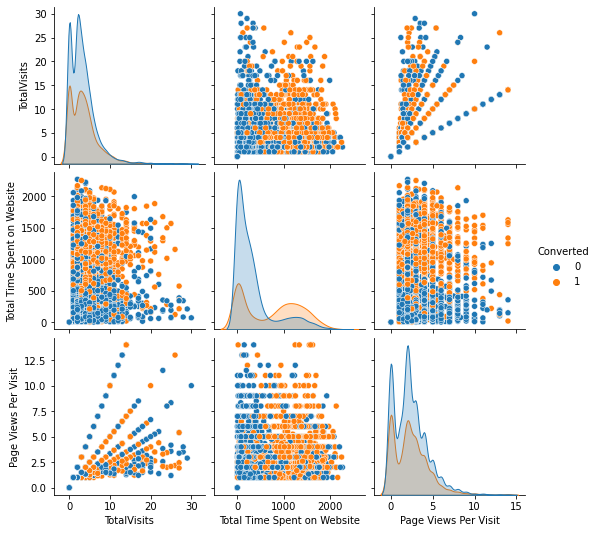

In [42]:
#Pairplotting the continuous variables to see correlations
plt.figure(figsize=(80,60))
sns.pairplot(lead_df, diag_kind='kde', hue='Converted')
plt.show()

There seems to be a correlation between 'TotalVisits' and 'Page Views Per Visit'.

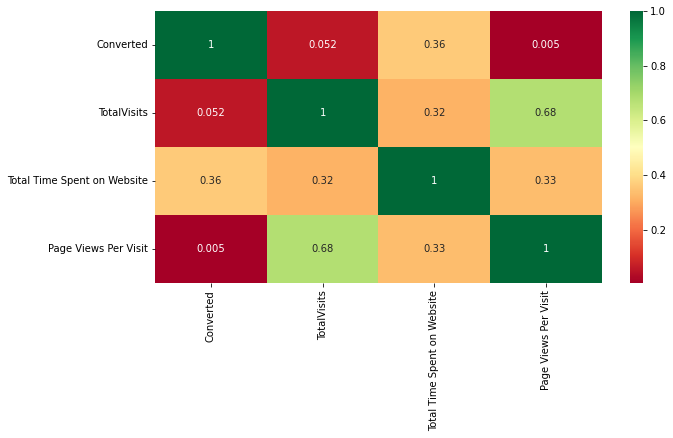

In [43]:
#Plotting heatmap to check for correlation between continuous variables
plt.figure(figsize=(10,5))
sns.heatmap(lead_df.corr(), cmap='RdYlGn', annot=True)
plt.show()

The heatmap also shows good correlation between 'TotalVisits' and 'Page Views Per Visit'.

## Data Pre-Processing

## Dummy Variables

In [44]:
#Checking the features in the dataset
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9055 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9055 non-null   object 
 1   Lead Source                                    9055 non-null   object 
 2   Do Not Email                                   9055 non-null   object 
 3   Do Not Call                                    9055 non-null   object 
 4   Converted                                      9055 non-null   int64  
 5   TotalVisits                                    9055 non-null   float64
 6   Total Time Spent on Website                    9055 non-null   int64  
 7   Page Views Per Visit                           9055 non-null   float64
 8   Country                                        9055 non-null   object 
 9   Specialization                                 9055 

In [45]:
#Creating a DataFrame of dummy variables
df_dum=pd.get_dummies(lead_df[var_cat], drop_first=True)

#Concatenating the dummy variable dataframe to the original dataframe
lead_final=pd.concat([lead_df,df_dum], axis=1)

#Displaying the head of the concatenated dataframe
lead_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Do Not Call_yes,Country_not declared,Country_outside india,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not declared,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_not declared,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_not declared,What matters most to you in choosing a course_other,Search_yes,Newspaper Article_yes,X Education Forums_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_graduation in progress,Tags_interested in full time mba,Tags_interested in other courses,Tags_lost to eins,Tags_not declared,Tags_not doing further education,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,City_not declared,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,not declared,not declared,unemployed,better career prospects,no,no,no,no,no,no,interested in other courses,not declared,no,modified,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,india,not declared,unemployed,better career prospects,no,no,no,no,no,no,ringing,not declared,no,email opened,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,landing page submission,d

In [46]:
#Checking the shape of the dataset
lead_final.shape

(9055, 115)

In [47]:
#Dropping the original columns from the new dataframe
lead_final.drop(var_cat, axis=1, inplace=True)
lead_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Do Not Call_yes,Country_not declared,Country_outside india,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not declared,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_not declared,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_not declared,What matters most to you in choosing a course_other,Search_yes,Newspaper Article_yes,X Education Forums_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_graduation in progress,Tags_interested in full time mba,Tags_interested in other courses,Tags_lost to eins,Tags_not declared,Tags_not doing further education,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,City_not declared,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [48]:
#Checking the shape after dropping the original variables
lead_final.shape

(9055, 97)

## Train-Test Split 

In [49]:
#Importing the required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [50]:
#Splitting the target variable from the rest of the dataset
y = lead_final.pop('Converted')
x = lead_final

In [51]:
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Do Not Call_yes,Country_not declared,Country_outside india,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not declared,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_not declared,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_not declared,What matters most to you in choosing a course_other,Search_yes,Newspaper Article_yes,X Education Forums_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_graduation in progress,Tags_interested in full time mba,Tags_interested in other courses,Tags_lost to eins,Tags_not declared,Tags_not doing further education,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,City_not declared,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [52]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
#Splitting the dataset into train and test datasets
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.70, random_state=42)

In [54]:
#Scaling the continuous features of the training dataset
scaler = MinMaxScaler()
x_train[var_num] = scaler.fit_transform(x_train[var_num])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Do Not Call_yes,Country_not declared,Country_outside india,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not declared,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_not declared,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_not declared,What matters most to you in choosing a course_other,Search_yes,Newspaper Article_yes,X Education Forums_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_graduation in progress,Tags_interested in full time mba,Tags_interested in other courses,Tags_lost to eins,Tags_not declared,Tags_not doing further education,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,City_not declared,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
8282,0.300000,0.579225,0.321429,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5551,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4867,0.133333,0.442342,0.095000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3388,0.066667,0.779049,0.142857,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1847,0.166667,0.101673,0.357143,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

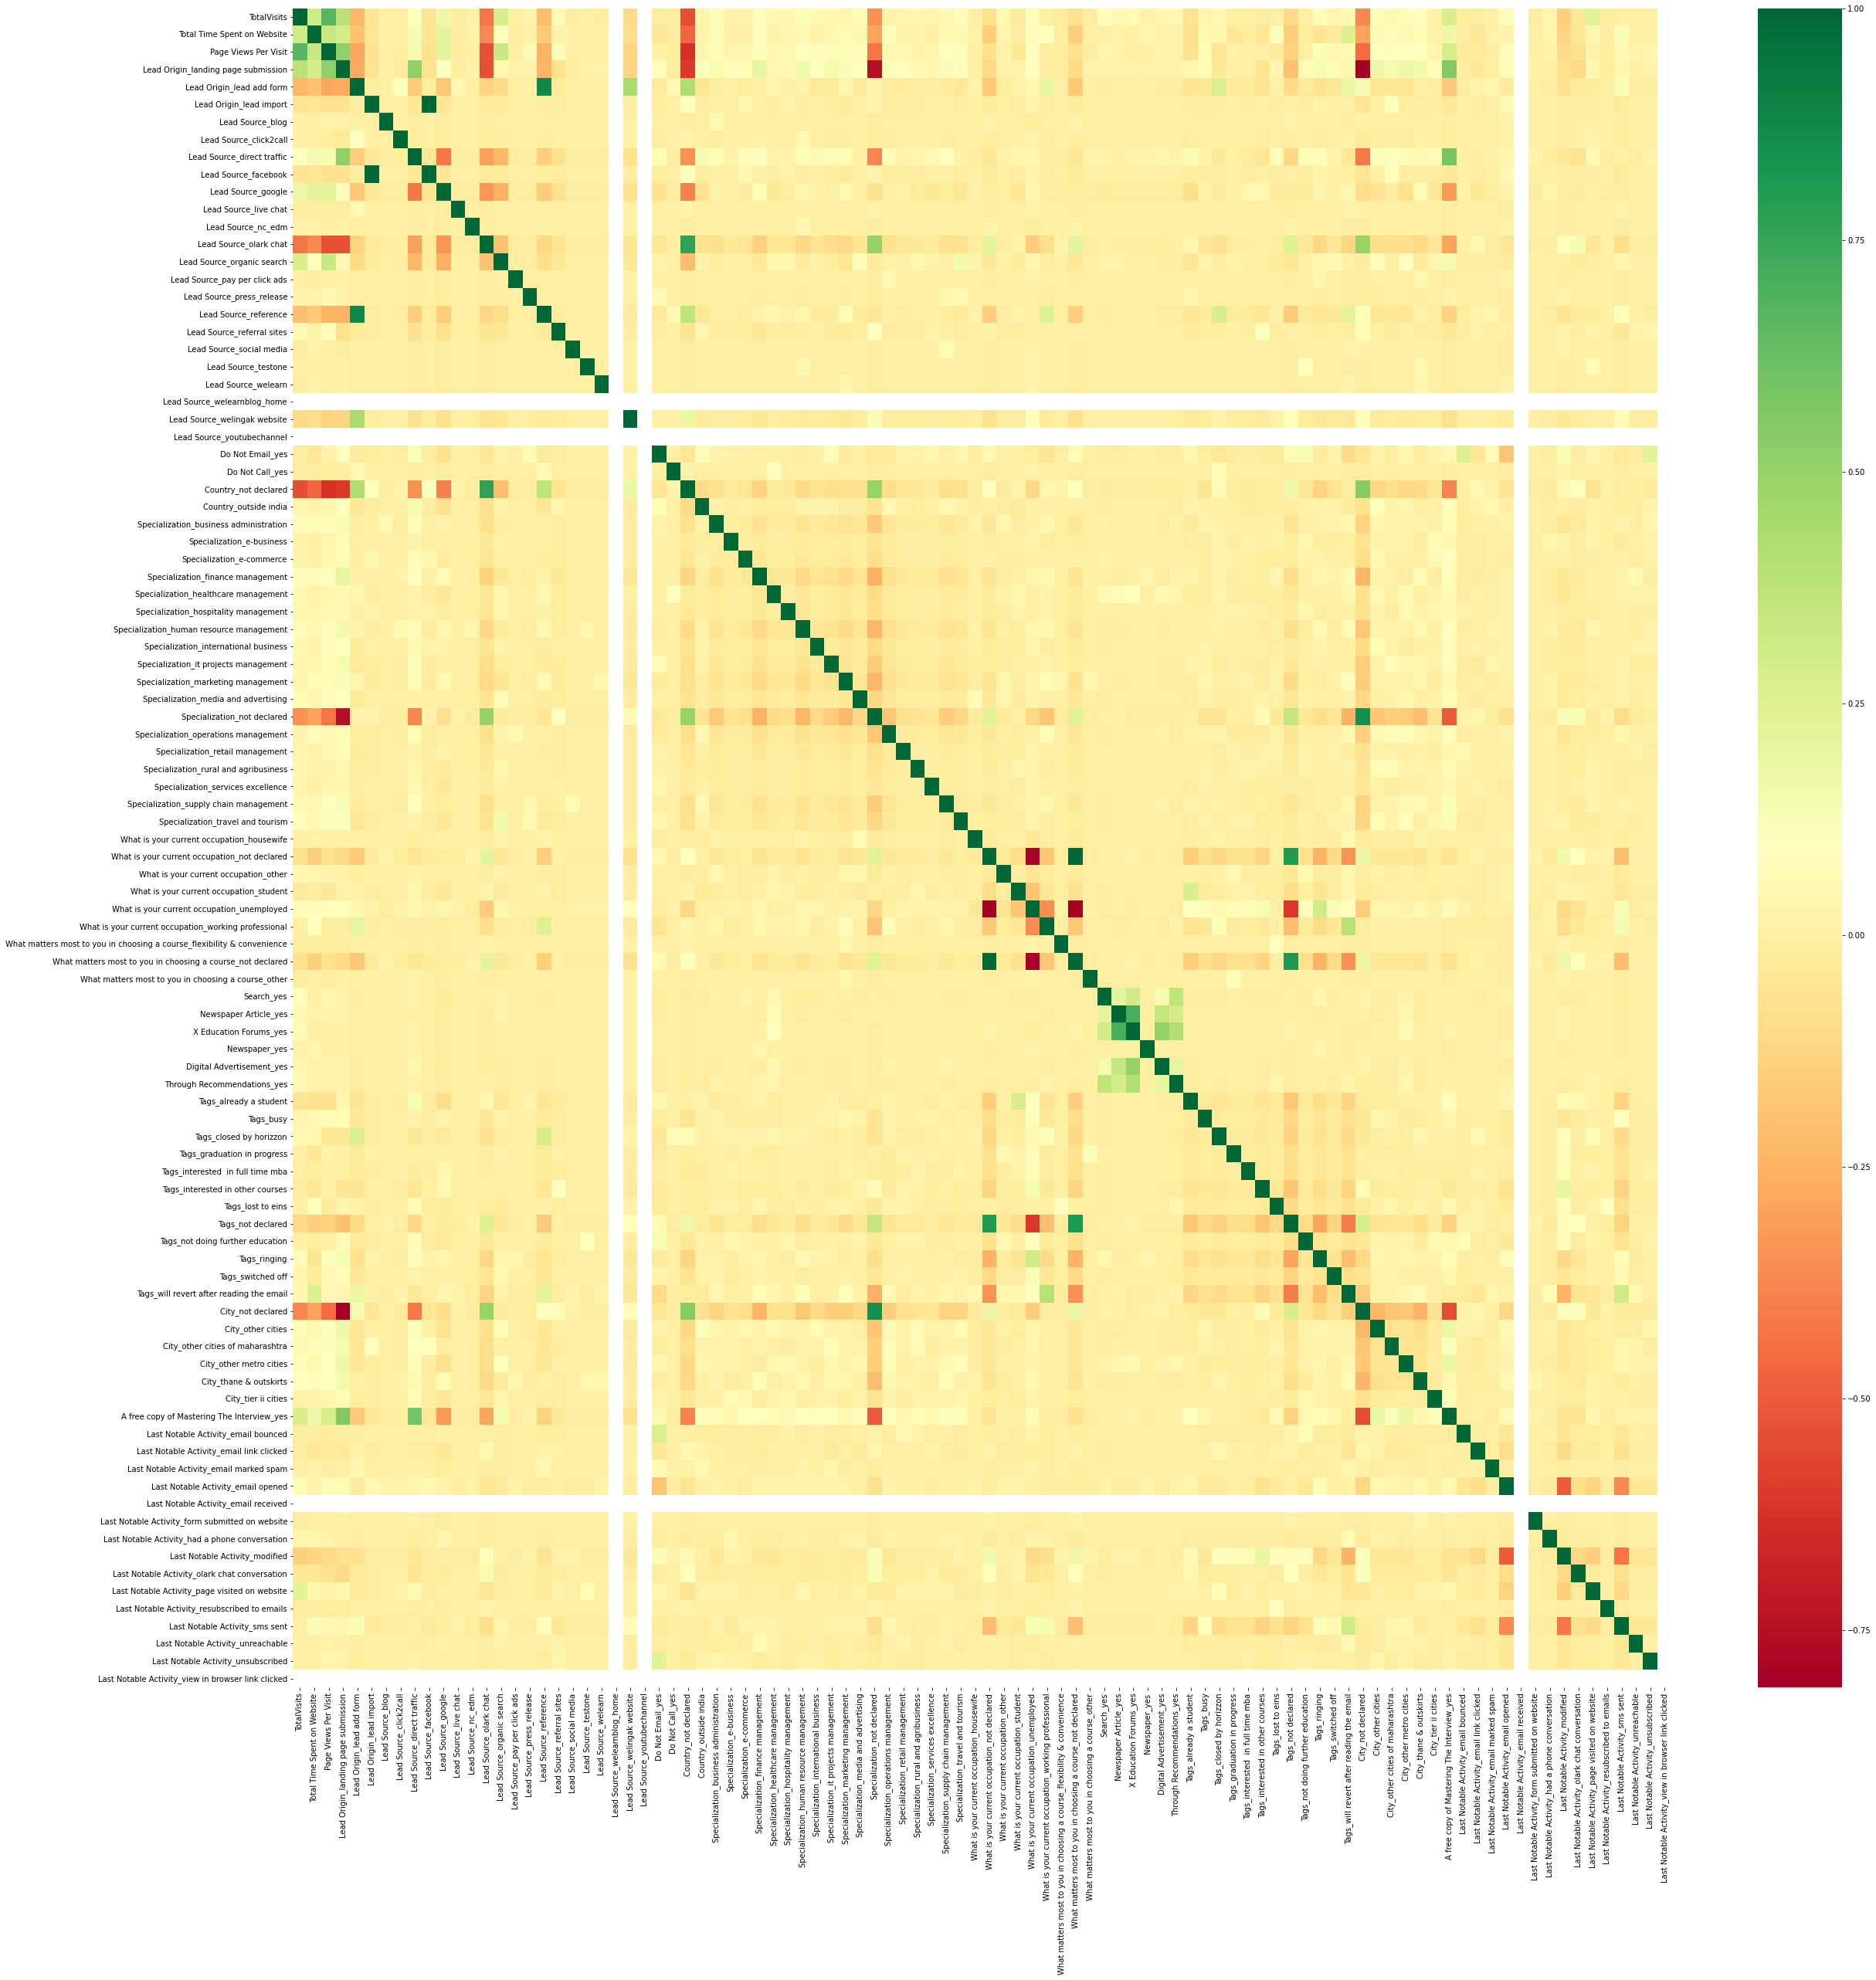

In [55]:
#Checking the correlation between the variables using heatmap
plt.figure(figsize=(40,40))
sns.heatmap(x_train.corr(),cmap='RdYlGn')
plt.show()

There are obviously too many variables to check for correlations. So its better to move forward with RFE feature selection

## Model Building

In [56]:
#Importing the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
#Feature Selection using RFE
lgreg = LogisticRegression() #Initialization

rfe = RFE(lgreg, n_features_to_select=15)
rfe = rfe.fit(x_train,y_train)

In [58]:
#Checking the features that have been selected by RFE
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_landing page submission', False, 32),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 22),
 ('Lead Source_blog', False, 41),
 ('Lead Source_click2call', False, 50),
 ('Lead Source_direct traffic', False, 26),
 ('Lead Source_facebook', False, 13),
 ('Lead Source_google', False, 47),
 ('Lead Source_live chat', False, 78),
 ('Lead Source_nc_edm', False, 11),
 ('Lead Source_olark chat', False, 46),
 ('Lead Source_organic search', False, 59),
 ('Lead Source_pay per click ads', False, 77),
 ('Lead Source_press_release', False, 63),
 ('Lead Source_reference', False, 37),
 ('Lead Source_referral sites', False, 45),
 ('Lead Source_social media', False, 57),
 ('Lead Source_testone', False, 74),
 ('Lead Source_welearn', False, 75),
 ('Lead Source_welearnblog_home', False, 79),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechan

In [59]:
#Recording all the selected features in a list
cols=x_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'What matters most to you in choosing a course_not declared',
       'Tags_already a student', 'Tags_busy', 'Tags_closed by horizzon',
       'Tags_lost to eins', 'Tags_not declared', 'Tags_ringing',
       'Tags_switched off', 'Tags_will revert after reading the email',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_sms sent'],
      dtype='object')

In [60]:
#Removing the unselected features from the training dataset
x_train = x_train[cols]

In [61]:
#Creating function for getting statsmodels model and summary
def get_model(y,x):
    logm = sm.GLM(y,sm.add_constant(x),family=sm.families.Binomial())
    lm = logm.fit()
    print(lm.summary())
    return lm

In [62]:
#Creating function to return the variance inflation factors of the respective features in a certain model
def get_vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

### Model 1

In [63]:
#Creating the model and Getting the model summary
get_model(y_train,x_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.2
Date:                Sun, 16 Apr 2023   Deviance:                       2238.3
Time:                        12:09:27   Pearson chi2:                 8.48e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6219
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [64]:
#Dropping 'Tags_already a student' as it has a high p-value
x_train.drop('Tags_already a student', axis=1, inplace=True)

### Model 2

In [65]:
#Creating the model and Getting the model summary
get_model(y_train,x_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1120.2
Date:                Sun, 16 Apr 2023   Deviance:                       2240.4
Time:                        12:09:27   Pearson chi2:                 8.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6218
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [66]:
#Checking the vif values since the p-values seem to be OK
get_vif(x_train)

                                             Features   VIF
8                                   Tags_not declared  5.21
4   What matters most to you in choosing a course_...  4.65
0                         Total Time Spent on Website  1.99
11           Tags_will revert after reading the email  1.97
1                           Lead Origin_lead add form  1.69
13                     Last Notable Activity_sms sent  1.62
2                        Lead Source_welingak website  1.39
6                             Tags_closed by horizzon  1.23
9                                        Tags_ringing  1.16
7                                   Tags_lost to eins  1.09
3                                    Do Not Email_yes  1.07
5                                           Tags_busy  1.06
10                                  Tags_switched off  1.04
12      Last Notable Activity_olark chat conversation  1.03


In [67]:
#Dropping 'Tags_not declared' as it has a considerable vif
x_train.drop('Tags_not declared', axis=1, inplace=True)

### Model 3

In [68]:
#Creating the model and Getting the model summary
get_model(y_train,x_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1368.0
Date:                Sun, 16 Apr 2023   Deviance:                       2736.0
Time:                        12:09:27   Pearson chi2:                 7.98e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5911
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [69]:
#Dropping 'Last Notable Activity_olark chat conversation' as it has a high p-value
x_train.drop('Last Notable Activity_olark chat conversation', axis=1, inplace=True)

### Model 4

In [70]:
#Creating the model and Getting the model summary
get_model(y_train,x_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1368.6
Date:                Sun, 16 Apr 2023   Deviance:                       2737.2
Time:                        12:09:27   Pearson chi2:                 8.03e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5910
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [71]:
#Checking the vif values 
get_vif(x_train)

                                             Features   VIF
0                         Total Time Spent on Website  1.88
10           Tags_will revert after reading the email  1.87
1                           Lead Origin_lead add form  1.68
11                     Last Notable Activity_sms sent  1.55
2                        Lead Source_welingak website  1.31
6                             Tags_closed by horizzon  1.22
4   What matters most to you in choosing a course_...  1.17
8                                        Tags_ringing  1.14
3                                    Do Not Email_yes  1.07
5                                           Tags_busy  1.06
7                                   Tags_lost to eins  1.05
9                                   Tags_switched off  1.04


In [72]:
#Dropping 'Tags_busy' as it has a high p-value
x_train.drop('Tags_busy', axis=1, inplace=True)

### Model 5

In [73]:
#Creating the model and Getting the model summary
res = get_model(y_train,x_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1372.3
Date:                Sun, 16 Apr 2023   Deviance:                       2744.6
Time:                        12:09:27   Pearson chi2:                 8.14e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5905
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [74]:
#Checking the vif values since the p-values seem to be OK
get_vif(x_train)

                                             Features   VIF
0                         Total Time Spent on Website  1.84
9            Tags_will revert after reading the email  1.83
1                           Lead Origin_lead add form  1.68
10                     Last Notable Activity_sms sent  1.51
2                        Lead Source_welingak website  1.31
5                             Tags_closed by horizzon  1.22
4   What matters most to you in choosing a course_...  1.16
7                                        Tags_ringing  1.13
3                                    Do Not Email_yes  1.07
6                                   Tags_lost to eins  1.05
8                                   Tags_switched off  1.04


**Model 5** is finalized as all the features are significant as indicated by the p-values and the multicollinearity is also in the desirable amount as indicated by the vif values.

## Creating Prediction

In [75]:
#Predicting the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(x_train))
y_train_pred[:10]

8282    0.977950
5551    0.857237
4867    0.742454
3388    0.999340
1847    0.049353
5478    0.025402
3557    0.078376
5338    0.014232
6116    0.010031
3936    0.988860
dtype: float64

In [76]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.97794986, 0.85723673, 0.74245384, ..., 0.015476  , 0.9852387 ,
       0.11284982])

In [77]:
y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_df.head()

,Converted,Conversion_Prob
0,1,0.977950
1,1,0.857237
2,1,0.742454
3,1,0.999340
4,0,0.049353


In [78]:
#Predicting the conversion rate based on an arbitrary threshold value of 0.5 
y_train_pred_df['Predicted'] = y_train_pred_df['Conversion_Prob'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_df.head()

,Converted,Conversion_Prob,Predicted
0,1,0.977950,1
1,1,0.857237,1
2,1,0.742454,1
3,1,0.999340,1
4,0,0.049353,0


## Model Evaluation 

In [79]:
#Importing metrics from SKLearn Library
from sklearn import metrics

In [80]:
#Creating a function to return the parameters of a confusion matrix
def get_confusion(a,b):
    confusion = metrics.confusion_matrix(a,b)
    #Assigning the True Negatives
    TN = confusion[0,0]
    #Assigning the False Positives
    FP = confusion[0,1]
    #Assigning the False Negatives
    FN = confusion[1,0]
    #Assigning the True Positives
    TP = confusion[1,1]
    print(confusion)
    
    return TN,FP,FN,TP

In [81]:
#Getting the confusion matrix
TN,FP,FN,TP = get_confusion(y_train_pred_df.Converted,y_train_pred_df.Predicted)

[[3783  161]
 [ 348 2046]]


In [82]:
#Checking the accuracy score
metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted)

0.9196907541811297

In [83]:
#Calculating the sensitivity
TP/(TP+FN)

0.8546365914786967

In [84]:
#Calculating the specificity
TN/(TN+FP)

0.9591784989858012

**Results with Threshold Value of 0.5 on Train Dataset**<br><br>
Accuracy - 91.9%<br><br>
Sensitivity - 85.5%<br><br>
Specificity - 95.9%

## ROC Curve

In [85]:
#Defining a function to plot the ROC Curve
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = "ROC Curve (Area=%0.2f)" % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

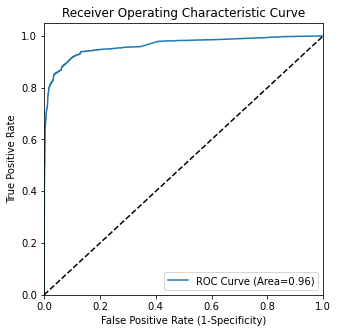

In [86]:
#Calling the function to plot the ROC Curve
draw_roc(y_train_pred_df.Converted,y_train_pred_df.Conversion_Prob)

The **ROC Curve** is tending to the upper left corner and has an Area of **0.96** which indicates a good model.

In [87]:
#Creating a DataFrame with Predicted values with different threshold values
values=[float(x)/10 for x in range(10)]
for i in values:
    y_train_pred_df[i] = y_train_pred_df['Conversion_Prob'].map(lambda x : 1 if x>i else 0)
y_train_pred_df.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.977950,1,1,1,1,1,1,1,1,1,1,1
1,1,0.857237,1,1,1,1,1,1,1,1,1,1,0
2,1,0.742454,1,1,1,1,1,1,1,1,1,0,0
3,1,0.999340,1,1,1,1,1,1,1,1,1,1,1
4,0,0.049353,0,1,0,0,0,0,0,0,0,0,0


In [88]:
#Creating a DataFrame with the values of accuracy, sensitivity and specificity against each threshold value
threshold_df = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity'])
for i in values:
    conf = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i])
    accuracy = metrics.accuracy_score(y_train_pred_df.Converted,y_train_pred_df[i])
    sens = conf[1,1]/(conf[1,1]+conf[1,0])
    spec = conf[0,0]/(conf[0,0]+conf[0,1])
    threshold_df.loc[i] = [i,accuracy,sens,spec]
threshold_df

,Threshold,Accuracy,Sensitivity,Specificity
0.0,0.0,0.377722,1.000000,0.000000
0.1,0.1,0.842853,0.949457,0.778144
0.2,0.2,0.901704,0.923977,0.888185
0.3,0.3,0.911644,0.894737,0.921907
0.4,0.4,0.914011,0.866750,0.942698
0.5,0.5,0.919691,0.854637,0.959178
0.6,0.6,0.916535,0.827485,0.970588
0.7,0.7,0.915115,0.809942,0.978955
0.8,0.8,0.910855,0.790309,0.984026
0.9,0.9,0.882455,0.700084,0.993154


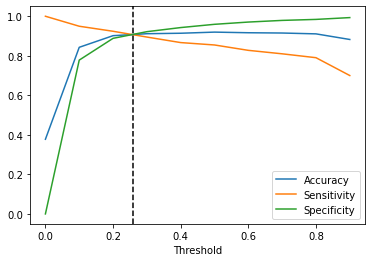

In [89]:
#Plotting the accuracy, sensitivity and specificity of the various thresholds
threshold_df.plot.line(x='Threshold', y=['Accuracy','Sensitivity','Specificity'])
plt.axvline(0.26, color='black', linestyle='--')
plt.show()

Looks like the optimal threshold value is around **0.26**.

In [90]:
#Adding the final prediction to the prediction dataframe using the optimal threshold value
y_train_pred_df['Final_Prediction'] = y_train_pred_df['Conversion_Prob'].map(lambda x : 1 if x>0.26 else 0)
y_train_pred_df.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction
0,1,0.977950,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.857237,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.742454,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.999340,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.049353,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
#Checking the accuracy score of the final prediction
metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Final_Prediction)

0.9091195960870937

In [92]:
#Getting the confusion matrix
TN,FP,FN,TP = get_confusion(y_train_pred_df.Converted,y_train_pred_df.Final_Prediction)

[[3593  351]
 [ 225 2169]]


In [93]:
#calculating the sensitivity
TP/(TP+FN)

0.9060150375939849

In [94]:
#calculating the specificity
TN/(TN+FP)

0.9110040567951319

**Results with Threshold Value of 0.26 on Train Dataset**<br><br>
Accuracy - 90.9%<br><br>
Sensitivity - 90.6%<br><br>
Specificity - 91.1%

## Prediction on Test Set

In [95]:
#Scaling the continuous variables
x_test[var_num] = scaler.transform(x_test[var_num])

In [96]:
#Selecting the columns in the final model in the test dataset
cols = x_train.columns
x_test = x_test[cols]

In [97]:
#Predicting the probabilities in the test dataset and creating a dataframe
y_test_pred = res.predict(sm.add_constant(x_test))
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_df=pd.DataFrame(columns=['Converted', 'Conversion_Prob'])
y_test_pred_df['Converted']=y_test.values
y_test_pred_df['Conversion_Prob']=y_test_pred
y_test_pred_df.head()

,Converted,Conversion_Prob
0,1,0.998155
1,0,0.021577
2,0,0.010701
3,1,0.054043
4,1,0.969951


In [98]:
#Making the final prediction in the test dataset
y_test_pred_df['Final_Prediction'] = y_test_pred_df['Conversion_Prob'].map(lambda x : 1 if x>0.26 else 0)
y_test_pred_df.head()

,Converted,Conversion_Prob,Final_Prediction
0,1,0.998155,1
1,0,0.021577,0
2,0,0.010701,0
3,1,0.054043,0
4,1,0.969951,1


In [99]:
#Checking the accuracy score
metrics.accuracy_score(y_test_pred_df.Converted, y_test_pred_df.Final_Prediction)

0.9120353330879647

In [100]:
#Getting the confusion matrix
TN,FP,FN,TP = get_confusion(y_test_pred_df.Converted,y_test_pred_df.Final_Prediction)

[[1538  141]
 [  98  940]]


In [101]:
#Checking the sensitivity
TP/(TP+FN)

0.905587668593449

In [102]:
#Checking the specificity
TN/(TN+FP)

0.9160214413341274

**Results with Threshold Value of 0.26 on Test Set**<br><br>
Accuracy - 91.2%<br><br>
Sensitivity - 90.5%<br><br>
Specificity - 91.6%

## Precision - Recall 

In [103]:
#Getting the confusion matrix of the predictions on the training dataset
TN,FP,FN,TP = get_confusion(y_train_pred_df.Converted,y_train_pred_df.Final_Prediction)

[[3593  351]
 [ 225 2169]]


In [104]:
#Checking the precision of the predictions
TP/(TP+FP)

0.8607142857142858

In [105]:
#Checking the recall of the predictions
TP/(TP+FN)

0.9060150375939849

**Results with Threshold Value of 0.26 on Train Data Set**<br><br>
Precision - 86%<br><br>
Recall - 90.6%<br><br>

### Precision-Recall Tradeoff

In [106]:
#Importing the necessary method
from sklearn.metrics import precision_recall_curve

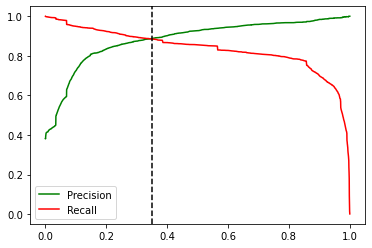

In [107]:
#Plotting the Precision-Recall Curve
p,r,thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Conversion_Prob)
plt.plot(thresholds,p[:-1],'g-',label='Precision')
plt.plot(thresholds,r[:-1],'r-',label='Recall')
plt.axvline(0.35, color='black', linestyle='--')
plt.legend()
plt.show()

According to the Precsion-Recall Tradeoff Curve the optimal threshold value seems to be **0.35**.

In [108]:
#Predicting the conversion rate using the threshold from precision-recall tradeoff 
y_train_pred_df['Final_PredictionPR'] = y_train_pred_df['Conversion_Prob'].map(lambda x : 1 if x>0.35 else 0)
y_train_pred_df.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction,Final_PredictionPR
0,1,0.977950,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.857237,1,1,1,1,1,1,1,1,1,1,0,1,1
2,1,0.742454,1,1,1,1,1,1,1,1,1,0,0,1,1
3,1,0.999340,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.049353,0,1,0,0,0,0,0,0,0,0,0,0,0


In [109]:
#Checking the accuracy of the Conversion Rates predicted using the threshold from the precision-recall curve
metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Final_PredictionPR)

0.914326285894604

In [110]:
#Getting the confusion matrix using Precision-Recall Threshold
TN,FP,FN,TP = get_confusion(y_train_pred_df.Converted,y_train_pred_df.Final_PredictionPR)

[[3675  269]
 [ 274 2120]]


In [111]:
#Checking the precision of the predictions
TP/(TP+FP)

0.8874005860192549

In [112]:
#Checking the recall of the predictions
TP/(TP+FN)

0.885547201336675

**Results with Threshold Value of 0.35 on Train Dataset**<br><br>
Accuracy - 91.4%<br><br>
Precision - 88.7%<br><br>
Recall - 88.5%

## Prediction on the Test Set

In [113]:
#Predicting the conversion rate on the test dataset using the threshold from the precsion-recall tradeoff
y_test_pred_df['Final_PredictionPR'] = y_test_pred_df['Conversion_Prob'].map(lambda x : 1 if x>0.35 else 0)
y_test_pred_df.head()

,Converted,Conversion_Prob,Final_Prediction,Final_PredictionPR
0,1,0.998155,1,1
1,0,0.021577,0,0
2,0,0.010701,0,0
3,1,0.054043,0,0
4,1,0.969951,1,1


In [114]:
#Checking the overall accuracy
metrics.accuracy_score(y_test_pred_df.Converted,y_test_pred_df.Final_PredictionPR)

0.9190283400809717

In [115]:
#Getting the confusion matrix
TN,FP,FN,TP = get_confusion(y_test_pred_df.Converted,y_test_pred_df.Final_PredictionPR)

[[1573  106]
 [ 114  924]]


In [116]:
#Checking the precision of the predictions
TP/(TP+FP)

0.8970873786407767

In [117]:
#Checking the recall of the predictions
TP/(TP+FN)

0.8901734104046243

**Results with Threshold Value of 0.35 on Test Dataset**<br><br>
Accuracy - 91.9%<br><br>
Precision - 89.7%<br><br>
Recall - 89.0%

## Lead_Score

### Train Dataset

In [118]:
#Calculating the lead _score for the training dataset
y_train_pred_df['Prospect_ID'] = y_train.index
y_train_pred_df['Lead_Score'] = round(y_train_pred_df['Conversion_Prob']*100).map(lambda x : int(x))
y_train_pred_df

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction,Final_PredictionPR,Prospect_ID,Lead_Score
0,1,0.977950,1,1,1,1,1,1,1,1,1,1,1,1,1,8282,98
1,1,0.857237,1,1,1,1,1,1,1,1,1,1,0,1,1,5551,86
2,1,0.742454,1,1,1,1,1,1,1,1,1,0,0,1,1,4867,74
3,1,0.999340,1,1,1,1,1,1,1,1,1,1,1,1,1,3388,100
4,0,0.049353,0,1,0,0,0,0,0,0,0,0,0,0,0,1847,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,0.002511,0,1,0,0,0,0,0,0,0,0,0,0,0,5863,0
6334,0,0.038664,0,1,0,0,0,0,0,0,0,0,0,0,0,5309,4
6335,0,0.015476,0,1,0,0,0,0,0,0,0,0,0,0,0,5511,2
6336,1,0.985239,1,1,1,1,1,1,1,1,1,1,1,1,1,899,99


In [119]:
#Isolating the columns related to lead_score
lead_df_train = y_train_pred_df[['Prospect_ID', 'Lead_Score','Converted']]
lead_df_train

,Prospect_ID,Lead_Score,Converted
0,8282,98,1
1,5551,86,1
2,4867,74,1
3,3388,100,1
4,1847,5,0
...,...,...,...
6333,5863,0,0
6334,5309,4,0
6335,5511,2,0
6336,899,99,1


From the **accuracy-sensitivity-specificity analysis** and the **precision-recall analysis**, the threshold of **Lead_Score** as **35** will help classify the leads as 'hot leads' or not.

In [120]:
#Predicting "Hot Leads" based on Lead_Score
lead_df_train['Lead_Score_Prediction'] = lead_df_train['Lead_Score'].map(lambda x: 1 if x>35 else 0)
lead_df_train.head()

,Prospect_ID,Lead_Score,Converted,Lead_Score_Prediction
0,8282,98,1,1
1,5551,86,1,1
2,4867,74,1,1
3,3388,100,1,1
4,1847,5,0,0


#### Checking the evaluation metrics of the results on the train dataset

In [121]:
#Checking the accuracy
metrics.accuracy_score(lead_df_train.Converted, lead_df_train.Lead_Score_Prediction)

0.9144840643736194

In [122]:
#Getting the confusion matrix 
TN,FP,FN,TP = get_confusion(lead_df_train.Converted, lead_df_train.Lead_Score_Prediction)

[[3680  264]
 [ 278 2116]]


In [123]:
#Checking the Sensitivity/Recall
TP/(TP+FN)

0.883876357560568

In [124]:
#Checking the Specificity
TN/(TN+FP)

0.9330628803245437

In [125]:
#Checking the Precision
TP/(TP+FP)

0.8890756302521008

In [126]:
#Checking the Negative Predictive Value
TN/(TN+FN)

0.9297625063163214

**Results on the Train Dataset with a Lead Score threshold of 35**<br><br>
Accuracy - 91.4%<br><br>
Sensitivity/Recall - 88.4%<br><br>
Specificity - 93.3%<br><br>
Precision - 88.9%<br><br>
Negative Predictive Value - 93.0%

### Test Dataset

In [127]:
#Calculating the lead _score for the test dataset
y_test_pred_df['Prospect_ID'] = y_test.index
y_test_pred_df['Lead_Score'] = round(y_test_pred_df['Conversion_Prob']*100).map(lambda x : int(x))
y_test_pred_df

,Converted,Conversion_Prob,Final_Prediction,Final_PredictionPR,Prospect_ID,Lead_Score
0,1,0.998155,1,1,6422,100
1,0,0.021577,0,0,7426,2
2,0,0.010701,0,0,8793,1
3,1,0.054043,0,0,801,5
4,1,0.969951,1,1,1783,97
...,...,...,...,...,...,...
2712,0,0.014189,0,0,2858,1
2713,0,0.041287,0,0,5047,4
2714,0,0.050434,0,0,393,5
2715,0,0.339830,1,0,4348,34


In [128]:
#Isolating the columns related to lead_score
lead_df_test = y_test_pred_df[['Prospect_ID', 'Lead_Score','Converted']]
lead_df_test

,Prospect_ID,Lead_Score,Converted
0,6422,100,1
1,7426,2,0
2,8793,1,0
3,801,5,1
4,1783,97,1
...,...,...,...
2712,2858,1,0
2713,5047,4,0
2714,393,5,0
2715,4348,34,0


Keeping the **Lead_Score** threshold as **35** as done for training dataset.

In [129]:
#Predicting "Hot Leads" based on Lead_Score
lead_df_test['Lead_Score_Prediction'] = lead_df_test['Lead_Score'].map(lambda x: 1 if x>35 else 0)
lead_df_test.head()

,Prospect_ID,Lead_Score,Converted,Lead_Score_Prediction
0,6422,100,1,1
1,7426,2,0,0
2,8793,1,0,0
3,801,5,1,0
4,1783,97,1,1


#### Checking the evaluation metrics of the results on the test dataset

In [130]:
#Checking the accuracy
metrics.accuracy_score(lead_df_test.Converted, lead_df_test.Lead_Score_Prediction)

0.9182922340817078

In [131]:
#Getting the confusion matrix 
TN,FP,FN,TP = get_confusion(lead_df_test.Converted, lead_df_test.Lead_Score_Prediction)

[[1574  105]
 [ 117  921]]


In [132]:
#Checking the Sensitivity/Recall
TP/(TP+FN)

0.8872832369942196

In [133]:
#Checking the Specificity
TN/(TN+FP)

0.9374627754615843

In [134]:
#Checking the Precision
TP/(TP+FP)

0.8976608187134503

In [135]:
#Checking the Negative Predictive Value
TN/(TN+FN)

0.9308101714961561

**Results on the Test Dataset with a Lead Score threshold of 35**<br><br>
Accuracy - 91.8%<br><br>
Sensitivity/Recall - 88.7%<br><br>
Specificity - 93.7%<br><br>
Precision - 89.8%<br><br>
Negative Predictive Value - 93.1%

## Conclusion

The Model that has been finalized, has the characteristics that determine a 'Hot Lead' in descending order of influence listed below:<br><br>
1.Leads having the tag 'closed by horizzon'<br><br>
2.Leads having the tag 'lost to eins'<br><br>
3.Leads having the tag 'will revert after reading the email'<br><br>
4.Leads that have been sourced from the welingak website.<br><br>
5.Total Time Spent on Website<br><br>
6.Leads having the last notable activity as 'sms_sent'<br><br>
7.Leads that have been ascertained through the lead add form.<br><br>
8.Leads that have not declared an answer to the question 'What matters most to you in choosing a course' <br><br>
9.Leads who have checked the option to not be emailed.<br><br>
10.Leads having the tag 'ringing'<br><br>
11.Leads having the tag 'switched off'<br><br><br>

The model produced predictions with very good accuracy and also performed well with the other evaluation metrics such as sensitivity, specificity, precision, recall, etc..
